## Información del Cuaderno

**Máster en Computación Cuántica - UNIR**

**Asignatura:** Computación Cuántica

**Actividad del Cuaderno por:** Albert Nieto Morales, Javier Hernanz Zajara

**Fecha:** 2023-12-27

---

*Nota: Este cuaderno es parte del programa de Máster en Computación Cuántica en UNIR. El contenido se centra en la Computación Cuántica y fue creado por Albert Nieto Morales, Javier Hernanz Zajara. Consulte la fecha para la última actualización.*


# Enunciado y librerías

### Introducción

En esta actividad, se busca desarrollar competencias clave en el manejo de conceptos fundamentales de computación cuántica. Los objetivos principales incluyen la utilización de puertas cuánticas básicas, la comprensión de la evolución del estado cuántico, la exploración de los estados de Bell y la implementación de un incrementador cuántico.

### Pautas de Elaboración

**Ejercicio 1: Evolución a Estados de Bell**

Se propone la implementación de cuatro circuitos cuánticos, cada uno evolucionando el estado del sistema a uno de los cuatro Estados de Bell. La descripción de la evolución se realiza tanto con notación de Dirac como en forma matricial. La verificación se lleva a cabo mediante la implementación en Qiskit Quantum Lab.

**Ejercicio 2: Suma Cuántica de Cúbits**

Se plantea la implementación de circuitos cuánticos de cuatro cúbits que suman los valores del 1 al 8 en un registro cuántico. La verificación de su correcto funcionamiento se realiza en Qiskit Quantum Lab.

**Ejercicio 3: Teleportación Cuántica**

Implementar en Python el algoritmo de teleportación cuántica para teleportar el estado  del cúbit de Alice al cúbit de Bob. El estado  viene determinado por los ángulos  grados y  grados, de la esfera de Bloch.

## Librerías

Los paquetes necesarios para realizar la actividad son:

- `qiskit`: La biblioteca principal de Qiskit.
- `qiskit_ibm_provider`: Proporciona acceso a los servicios en la nube de IBM Quantum.
- `qiskit-aer`: Proporciona acceso a simuladores cuánticos.

In [1]:
%%capture
%pip install qiskit
%pip install qiskit_ibm_provider
%pip install qiskit-aer

In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, QuantumCircuit, transpile, Aer
from qiskit_ibm_provider import IBMProvider
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import C3XGate

# Importing matplotlib
import matplotlib.pyplot as plt

# Importing Numpy, Cmath and math
import numpy as np
import os, math, cmath
from numpy import pi

# Other imports
from IPython.display import display, Math, Latex

Cargamos y actualizamos el entorno con las variables de entorno guardadas en `config.env`.

In [3]:
# Specify the path to your env file
env_file_path = 'config.env'

# Load environment variables from the file
os.environ.update(line.strip().split('=', 1) for line in open(env_file_path) if '=' in line and not line.startswith('#'))

# Load IBM Provider API KEY
IBMP_API_KEY = os.environ.get('IBMP_API_KEY')

Luego, extraemos la clave de API de IBM Quantum Provider y se guarda en la variable `IBMP_API_KEY`.

In [4]:
# Loading your IBM Quantum account(s)
IBMProvider.save_account(IBMP_API_KEY, overwrite=True)

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Ejercicio 1
Implementar cuatro circuitos cuánticos de forma que cada uno de ellos haga evolucionar el estado del sistema a cada uno de los cuatro estados de Bell. Describe la evolución del sistema paso a paso de dos formas: con notación de Dirac y en forma matricial. Finalmente, implementa los circuitos utilizando QISKIt Quantum Lab y verifica que los resultados son los esperados.

## Estados de Bell

En computación cuántica, los Estados de Bell son un conjunto de cuatro estados cuánticos maximamente entrelazados. Estos estados, también conocidos como "pares EPR" o "qubits entrelazados", son generados mediante una serie de operaciones cuánticas específicas. Los cuatro Estados de Bell se denotan como:

$$ |\Phi^+\rangle = \frac{1}{\sqrt 2}(|0\rangle_A \otimes |0\rangle_B+|1\rangle_A \otimes |1\rangle_B) = \frac{|00\rangle + |11\rangle}{\sqrt 2}  = \frac{1}{\sqrt 2} |00\rangle + \frac{1}{\sqrt 2} |11\rangle = \frac{1}{\sqrt 2} ( |00\rangle + |11\rangle ) $$

$$ |\Phi^-\rangle = \frac{1}{\sqrt 2}(|0\rangle_A \otimes |0\rangle_B - |1\rangle_A \otimes |1\rangle_B)  = \frac{|00\rangle - |11\rangle}{\sqrt 2}  = \frac{1}{\sqrt 2} |00\rangle - \frac{1}{\sqrt 2} |11\rangle = \frac{1}{\sqrt 2} ( |00\rangle - |11\rangle ) $$

$$ |\Psi^+ \rangle = \frac{1}{\sqrt 2}(|0\rangle_A \otimes |1\rangle_B+|1\rangle_A \otimes |0\rangle_B)  = \frac{|01\rangle + |10\rangle}{\sqrt 2}  = \frac{1}{\sqrt 2} |01\rangle + \frac{1}{\sqrt 2} |10\rangle = \frac{1}{\sqrt 2} ( |01\rangle + |10\rangle ) $$

$$ |\Psi^- \rangle = \frac{1}{\sqrt 2}(|0\rangle_A \otimes |1\rangle_B - |1\rangle_A \otimes |0\rangle_B) = \frac{|01\rangle - |10\rangle}{\sqrt 2} = \frac{1}{\sqrt 2} |01\rangle - \frac{1}{\sqrt 2} |10\rangle = \frac{1}{\sqrt 2} ( |01\rangle - |10\rangle ) $$

Para realizar este ejercicio, definamos los vectores de estado $|0⟩$ y $|1⟩$ con su forma matricial en NumPy.

In [5]:
sv_0 = np.array([1, 0])
sv_1 = np.array([0, 1])

## Funciones auxiliares

Para simplificar los pasos, se ha creado una función principal llamada `array_to_dirac_and_matrix_latex`. Esta función toma una matriz de NumPy que representa el estado del sistema y genera código LaTeX para visualizar tanto la representación matricial como la notación de Dirac del estado cuántico. Además, utiliza tres funciones auxiliares para realizar estas tareas:

- **`array_to_matrix_representation`**: Convierte un array unidimensional en una representación matricial en columna.

- **`array_to_dirac_notation`**: Convierte un array complejo que representa un estado cuántico en superposición a la notación de Dirac.

- **`find_symbolic_representation`**: Verifica si un valor numérico corresponde a una constante simbólica dentro de una tolerancia especificada. Si se encuentra una correspondencia, devuelve la representación simbólica como cadena (con un signo '-' si el valor es negativo), de lo contrario, devuelve el valor original.

### `is_symbolic_constant` Function:

**Purpose:**
The `is_symbolic_constant` function checks if an amplitude corresponds to a symbolic constant within a specified tolerance.

**Attributes:**
- `amplitude` (float): The amplitude to check.
- `symbolic_constants` (dict): A dictionary mapping numerical values to their symbolic representations.
- `tolerance` (float): Tolerance for comparing amplitudes with symbolic constants.

**Methods:**
None

**Example Usage:**
```python
symbol = is_symbolic_constant(my_amplitude)


In [6]:
def find_symbolic_representation(value, symbolic_constants={1/np.sqrt(2): '1/√2'}, tolerance=1e-10):
    """
    Check if the given numerical value corresponds to a symbolic constant within a specified tolerance.

    Parameters:
    - value (float): The numerical value to check.
    - symbolic_constants (dict): A dictionary mapping numerical values to their symbolic representations.
                                Defaults to {1/np.sqrt(2): '1/√2'}.
    - tolerance (float): Tolerance for comparing values with symbolic constants. Defaults to 1e-10.

    Returns:
    str or float: If a match is found, returns the symbolic representation as a string 
                  (prefixed with '-' if the value is negative); otherwise, returns the original value.
    """
    for constant, symbol in symbolic_constants.items():
        if np.isclose(abs(value), constant, atol=tolerance):
            return symbol if value >= 0 else '-' + symbol
    return value


### `array_to_dirac_notation` Function:

**Purpose:**
The `array_to_dirac_notation` function is designed to convert a complex-valued array representing a quantum state in superposition to Dirac notation.

**Attributes:**
- `array` (numpy.ndarray): The complex-valued array representing the quantum state in superposition.
- `tolerance` (float): Tolerance for considering amplitudes as negligible.

**Methods:**
None

**Example Usage:**
```python
dirac_notation = array_to_dirac_notation(my_quantum_state)


In [7]:
def array_to_dirac_notation(array, tolerance=1e-10):
    """
    Convert a complex-valued array representing a quantum state in superposition
    to Dirac notation.

    Parameters:
    - array (numpy.ndarray): The complex-valued array representing
      the quantum state in superposition.
    - tolerance (float): Tolerance for considering amplitudes as negligible.

    Returns:
    str: The Dirac notation representation of the quantum state.
    """
    # Ensure the statevector is normalized
    array = array / np.linalg.norm(array)

    # Get the number of qubits
    num_qubits = int(np.log2(len(array)))

    # Find indices where amplitude is not negligible
    non_zero_indices = np.where(np.abs(array) > tolerance)[0]

    # Generate Dirac notation terms
    terms = [
        (find_symbolic_representation(array[i]), format(i, f"0{num_qubits}b"))
        for i in non_zero_indices
    ]

    # Format Dirac notation
    dirac_notation = " + ".join([f"{amplitude}|{binary_rep}⟩" for amplitude, binary_rep in terms])

    return dirac_notation

### `array_to_matrix_representation` Function:

**Purpose:**
The `array_to_matrix_representation` function is designed to convert a one-dimensional array to a column matrix representation.

**Attributes:**
- `array` (numpy.ndarray): The one-dimensional array to be converted.

**Methods:**
None

**Example Usage:**
```python
matrix_rep = array_to_matrix_representation(my_array)


In [8]:
def array_to_matrix_representation(array):
    """
    Convert a one-dimensional array to a column matrix representation.

    Parameters:
    - array (numpy.ndarray): The one-dimensional array to be converted.

    Returns:
    numpy.ndarray: The column matrix representation of the input array.
    """
    # Replace symbolic constants with their representations
    matrix_representation = np.array([find_symbolic_representation(value) or value for value in array])

    # Return the column matrix representation
    return matrix_representation.reshape((len(matrix_representation), 1))

### `array_to_dirac_and_matrix_latex` Function:

**Purpose:**
The `array_to_dirac_and_matrix_latex` function is designed to generate LaTeX code for displaying both the matrix representation and Dirac notation of a quantum state.

**Attributes:**
- `array` (numpy.ndarray): The complex-valued array representing the quantum state.

**Methods:**
- `array_to_matrix_representation(array)`: Converts a one-dimensional array to a column matrix representation.
- `array_to_dirac_notation(array, tolerance=1e-10)`: Converts a complex-valued array representing a quantum state in superposition to Dirac notation.
- `is_symbolic_constant(amplitude, symbolic_constants={1/np.sqrt(2): '1/√2'}, tolerance=1e-10)`: Checks if an amplitude corresponds to a symbolic constant within a specified tolerance.

**Example Usage:**
```python
result = array_to_dirac_and_matrix_latex(my_quantum_state)


In [9]:
def array_to_dirac_and_matrix_latex(array):
    """
    Generate LaTeX code for displaying both the matrix representation and Dirac notation
    of a quantum state.

    Parameters:
    - array (numpy.ndarray): The complex-valued array representing the quantum state.

    Returns:

    Latex: A Latex object containing LaTeX code for displaying both representations.
    """
    matrix_representation = array_to_matrix_representation(array)
    latex = "Matrix representation\n\\begin{bmatrix}\n" + \
            "\\\\\n".join(map(str, matrix_representation.flatten())) + \
            "\n\\end{bmatrix}\n"
    latex += f'Dirac Notation:\n{array_to_dirac_notation(array)}'
    return Latex(latex)

## Estado de Bell $|\Phi^+\rangle$

El objetivo es llegar al estado 
$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ partiendo del estado base $|00\rangle$

### Desarrollo usando notación de Dirac

1. Partimos de dos qubits $|A\rangle$ y $|B\rangle$ inicializados a $|0\rangle$, lo cual también ilustraremos como: $|0\rangle_A$ y $|0\rangle_B$
1. Aplicamos una puerta Hadamard sobre $|0\rangle_A$ tal que: $\langle H|A\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|0\rangle_A + |1\rangle_A)$
1. Puesto que tenemos 2 qubits en nuestro sistema, debemos representarlos como el producto tensorial: $\langle H|A\rangle \otimes |B\rangle$  Equivalente a $\frac{1}{\sqrt 2}(|00\rangle + |10\rangle)$
1. Por último, necesitamos realizar la operación CNOT en $|B\rangle$ controlado por $|A\rangle$, por lo que tendríamos: $ \langle \text{CNOT} | (\langle H|A\rangle \otimes |B\rangle)\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$

### Desarrollo usando notación matricial


1. Definimos los qubits $|0\rangle_A = |0\rangle_B = \begin{bmatrix}
1\\
0
\end{bmatrix}$, la puerta Hadamard como: $H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$, la puerta CNOT como: $\text{CNOT}=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$
1. Aplicamos la puerta Hadamard sobre $|A\rangle$ de tal manera que:$\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} \begin{bmatrix}
1\\
0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
1
\end{bmatrix} $
1. Calculamos el estado del sistema considerando también $|B\rangle$ en forma de producto tensorial:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
1
\end{bmatrix} \otimes  \begin{bmatrix}
1\\
0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
0\\
1\\
0
\end{bmatrix}
$
1. Por último, aplicamos la puerta CNOT entre ambos qubits:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
1\\
0
\end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
0\\
0\\
1
\end{bmatrix}
$, que se puede comprobar corresponde a la representación matricial del estado buscado.

Aprovechando las facilidades de Qiskit, el mismo circuito se representaría tal que:

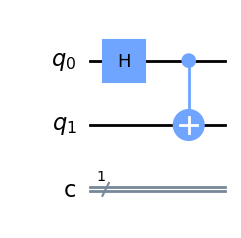

In [13]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

circuit.draw()

### Desarrollo algorítmico

In [10]:
sv_b1 = np.kron(sv_0, sv_0)
array_to_dirac_and_matrix_latex(sv_b1)

<IPython.core.display.Latex object>

Añadimos una puerta Hadamard al primer qubit:

In [11]:
sv_b1 = (np.kron(sv_0, sv_0) + np.kron(sv_0, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b1)

<IPython.core.display.Latex object>

Finalmente añadimos una puerta CNOT, donde el qubit de control es el primer qubit, y el qubit objetivo es el segundo:

In [12]:
sv_b1 = (np.kron(sv_0, sv_0) + np.kron(sv_1, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b1)

<IPython.core.display.Latex object>

## Estado de Bell $|\Phi^-\rangle$

El objetivo es llegar al estado 
$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ partiendo del estado base $|00\rangle$

### Desarrollo usando notación de Dirac

1. Partimos de dos qubits $|A\rangle$ y $|B\rangle$ inicializados a $|0\rangle$, lo cual también ilustraremos como: $|0\rangle_A$ y $|0\rangle_B$
1. Aplicamos una puerta Pauli X (X) sobre $|0\rangle_A$ tal que: $\langle X|A\rangle$ Equivalente a $|1\rangle_A$
1. A continuación aplicamos una puerta Hadamard (H) sobre $|0\rangle_A$ tal que: $\langle H|X|A\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|0\rangle_A - |1\rangle_A)$
1. Puesto que tenemos 2 qubits en nuestro sistema, debemos representarlos como el producto tensorial: $\langle H|X|A\rangle \otimes |B\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|00\rangle - |10\rangle)$
1. Por último, necesitamos realizar la operación CNOT en $|B\rangle$ controlado por $|A\rangle$, por lo que tendríamos: $ \langle \text{CNOT} | (\langle H|X|A\rangle \otimes |B\rangle)\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|00\rangle - |11\rangle)$ 

### Desarrollo usando notación matricial


1. Definimos los qubits $|0\rangle_A = |0\rangle_B = \begin{bmatrix}
1\\
0
\end{bmatrix}$, la puerta Hadamard como: $H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$, la puerta CNOT como: $\text{CNOT}=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$  y la puerta X (Pauli X) como: $X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$
1. Aplicamos respectivamente la puerta X y, a continuación, la Hadamard sobre $|A\rangle$ de tal manera que:$\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
-1
\end{bmatrix} $
1. Calculamos el estado del sistema considerando también $|B\rangle$ en forma de producto tensorial:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
-1
\end{bmatrix} \otimes  \begin{bmatrix}
1\\
0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
0\\
-1\\
0
\end{bmatrix}
$
1. Por último, aplicamos la puerta CNOT entre ambos qubits:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
-1\\
0
\end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
0\\
0\\
-1
\end{bmatrix}
$, que se puede comprobar corresponde a la representación matricial del estado buscado.

Aprovechando las facilidades de Qiskit, el mismo circuito se representaría tal que:

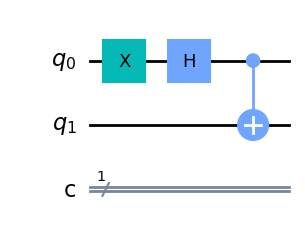

In [18]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

circuit.draw()

### Desarrollo algorítmico

In [14]:
sv_b2 = np.kron(sv_0, sv_0)
array_to_dirac_and_matrix_latex(sv_b2)

<IPython.core.display.Latex object>

Añadimos una puerta Hadamard al primer qubit:

In [15]:
sv_b2 = (np.kron(sv_0, sv_0) + np.kron(sv_0, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b2)

<IPython.core.display.Latex object>

Añadimos una puerta CNOT, donde el qubit de control es el primer qubit, y el qubit objetivo es el segundo:

In [16]:
sv_b2 = (np.kron(sv_0, sv_0) + np.kron(sv_1, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b2)

<IPython.core.display.Latex object>

Finalmente, añadimos una puerta Pauli-Z en el qubit 0 para pasar de $|+\rangle$ a $|-\rangle$.

In [17]:
sv_b2 = (np.kron(sv_0, sv_0) - np.kron(sv_1, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b2)

<IPython.core.display.Latex object>

## Estado de Bell $|\Psi^+\rangle$

El objetivo es llegar al estado 
$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ partiendo del estado base $|00\rangle$

### Desarrollo usando notación de Dirac

1. Partimos de dos qubits $|A\rangle$ y $|B\rangle$ inicializados a $|0\rangle$, lo cual también ilustraremos como: $|0\rangle_A$ y $|0\rangle_B$
1. Aplicamos una puerta Pauli X (X) sobre $|0\rangle_B$ tal que: $\langle X|B\rangle$ Equivalente a $|1\rangle_B$
1. En paralelo aplicamos una puerta Hadamard (H) sobre $|0\rangle_A$ tal que: $\langle H|A\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|0\rangle_A + |1\rangle_A)$
1. Puesto que tenemos 2 qubits en nuestro sistema, debemos representarlos como el producto tensorial: $\langle H|A\rangle \otimes \langle X|B\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|01\rangle + |11\rangle)$
1. Por último, necesitamos realizar la operación CNOT en $|B\rangle$ controlado por $|A\rangle$, por lo que tendríamos: $ \langle \text{CNOT} | (\langle H|A\rangle \otimes \langle X|B\rangle)\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|01\rangle + |10\rangle)$ 

### Desarrollo usando notación matricial


1. Definimos los qubits $|0\rangle_A = |0\rangle_B = \begin{bmatrix}
1\\
0
\end{bmatrix}$, la puerta Hadamard como: $H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$, la puerta CNOT como: $\text{CNOT}=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$  y la puerta X (Pauli X) como: $X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$
1. Aplicamos la puerta X sobre $|B\rangle$ de tal manera que:$
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
0
\end{bmatrix} = \begin{bmatrix}
0\\
1
\end{bmatrix} $
1. Aplicamos la puerta Hadamard sobre $|A\rangle$ de tal manera que:$\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} 
\begin{bmatrix}
1\\
0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
1
\end{bmatrix} $
1. Calculamos el estado del sistema considerando también $|B\rangle$ en forma de producto tensorial:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
1
\end{bmatrix} \otimes  \begin{bmatrix}
0\\
1
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
0\\
1\\
0\\
1
\end{bmatrix}
$
1. Por último, aplicamos la puerta CNOT entre ambos qubits:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
0\\
1
\end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix}
0\\
1\\
1\\
0
\end{bmatrix}
$, que se puede comprobar corresponde a la representación matricial del estado buscado.

Aprovechando las facilidades de Qiskit, el mismo circuito se representaría tal que:

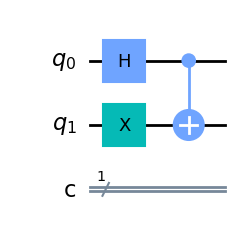

In [24]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])

circuit.draw()

### Desarrollo algorítmico

In [19]:
sv_b3 = np.kron(sv_0, sv_0)
array_to_dirac_and_matrix_latex(sv_b3)

<IPython.core.display.Latex object>

Añadimos una puerta Pauli-X al primer qubit:

In [20]:
sv_b3 = np.kron(sv_0, sv_1)
array_to_dirac_and_matrix_latex(sv_b3)

<IPython.core.display.Latex object>

Añadimos una puerta Hadamard al primer qubit:

In [21]:
sv_b3 = (np.kron(sv_0, sv_0) - np.kron(sv_0, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b3)

<IPython.core.display.Latex object>

Añadimos una puerta CNOT, donde el qubit de control es el primer qubit, y el qubit objetivo es el segundo:

In [22]:
sv_b3 = (np.kron(sv_0, sv_1) - np.kron(sv_1, sv_0)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b3)

<IPython.core.display.Latex object>

Finalmente, añadimos una puerta Pauli-Z en el qubit 0 para pasar de $|+\rangle$ a $|-\rangle$.

In [23]:
sv_b3 = (np.kron(sv_0, sv_1) + np.kron(sv_1, sv_0)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b3)

<IPython.core.display.Latex object>

## Estado de Bell $|\Psi^-\rangle$

El objetivo es llegar al estado 
$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$ partiendo del estado base $|00\rangle$

### Desarrollo usando notación de Dirac

1. Partimos de dos qubits $|A\rangle$ y $|B\rangle$ inicializados a $|0\rangle$, lo cual también ilustraremos como: $|0\rangle_A$ y $|0\rangle_B$
1. Aplicamos una puerta Pauli X (X) sobre $|0\rangle_B$ tal que: $\langle X|B\rangle$ Equivalente a $|1\rangle_B$
1. Aplicamos una puerta Pauli X (X) sobre $|0\rangle_A$ tal que: $\langle X|A\rangle$ Equivalente a $|1\rangle_A$
1. A continuación aplicamos una puerta Hadamard (H) en $|A\rangle$ tal que: $\langle H|X|A\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|0\rangle_A - |1\rangle_A)$
1. Puesto que tenemos 2 qubits en nuestro sistema, debemos representarlos como el producto tensorial: $\langle H|X|A\rangle \otimes \langle X|B\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|01\rangle - |11\rangle)$
1. Por último, necesitamos realizar la operación CNOT en $|B\rangle$ controlado por $|A\rangle$, por lo que tendríamos: $ \langle \text{CNOT} | (\langle H|X|A\rangle \otimes \langle X|B\rangle)\rangle$ Equivalente a $\frac{1}{\sqrt 2}(|01\rangle - |10\rangle)$ 

### Desarrollo usando notación matricial


1. Definimos los qubits $|0\rangle_A = |0\rangle_B = \begin{bmatrix}
1\\
0
\end{bmatrix}$, la puerta Hadamard como: $H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$, la puerta CNOT como: $\text{CNOT}=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$  y la puerta X (Pauli X) como: $X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$
1. Aplicamos la puerta X sobre $|B\rangle$ de tal manera que:$
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
0
\end{bmatrix} = \begin{bmatrix}
0\\
1
\end{bmatrix} $
1. Aplicamos las puertas X y Hadamard, en ese orden, sobre $|A\rangle$ de tal manera que:$\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1\\
0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
-1
\end{bmatrix} $
1. Calculamos el estado del sistema considerando también $|B\rangle$ en forma de producto tensorial:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1\\
-1
\end{bmatrix} \otimes  \begin{bmatrix}
0\\
1
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
0\\
1\\
0\\
-1
\end{bmatrix}
$
1. Por último, aplicamos la puerta CNOT entre ambos qubits:
$
\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
0\\
-1
\end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix}
0\\
1\\
-1\\
0
\end{bmatrix}
$, que se puede comprobar corresponde a la representación matricial del estado buscado.

Aprovechando las facilidades de Qiskit, el mismo circuito se representaría tal que:

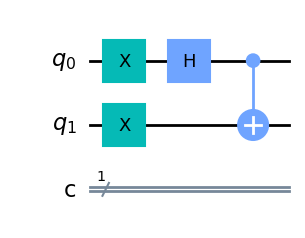

In [29]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])

circuit.draw()

### Desarrollo algorítmico

In [25]:
sv_b4 = np.kron(sv_0, sv_0)
array_to_dirac_and_matrix_latex(sv_b4)

<IPython.core.display.Latex object>

Añadimos una puerta Pauli-X al primer qubit:

In [26]:
sv_b4 = np.kron(sv_0, sv_1)
array_to_dirac_and_matrix_latex(sv_b4)

<IPython.core.display.Latex object>

Añadimos una puerta Hadamard al primer qubit:

In [27]:
sv_b4 = (np.kron(sv_0, sv_0) - np.kron(sv_0, sv_1)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b4)

<IPython.core.display.Latex object>

Añadimos una puerta CNOT, donde el qubit de control es el primer qubit, y el qubit objetivo es el segundo:

In [28]:
sv_b3 = (np.kron(sv_0, sv_1) - np.kron(sv_1, sv_0)) / np.sqrt(2)
array_to_dirac_and_matrix_latex(sv_b3)

<IPython.core.display.Latex object>

## Implementaciones con Qiskit
A continuación, se implementan los circuitos descritos anteriormente y se verifican haciendo uso de Qiskit.

### Circuito y verificación para $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

In [53]:
qc_b1 = QuantumCircuit(2, 2)
qc_b1.h(0)
qc_b1.cx(0, 1)

sv = backend.run(qc_b1).result().get_statevector()
sv.draw(output='latex', prefix = "|\Phi^+\\rangle = ")

<IPython.core.display.Latex object>

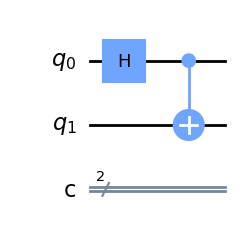

In [52]:
qc_b1.draw()

### Circuito y verificación para $|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

In [54]:
qc_b2 = QuantumCircuit(2, 2)
qc_b2.h(0)
qc_b2.cx(0, 1)
qc_b2.z(0)

sv = backend.run(qc_b2).result().get_statevector()
sv.draw(output='latex', prefix = "|\Phi^-\\rangle = ")

<IPython.core.display.Latex object>

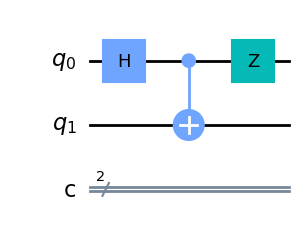

In [51]:
qc_b2.draw()

### Circuito y verificación para $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

In [47]:
qc_b3 = QuantumCircuit(2, 2)
qc_b3.h(0)
qc_b3.cx(0, 1)
qc_b3.x(0)

sv = backend.run(qc_b3).result().get_statevector()
sv.draw(output='latex', prefix = "|\Psi^+\\rangle = ")

<IPython.core.display.Latex object>

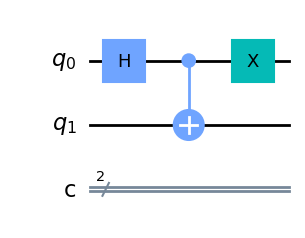

In [50]:
qc_b3.draw()

### Circuito y verificación para $|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

In [48]:
qc_b4 = QuantumCircuit(2, 2)
qc_b4.h(0)
qc_b4.cx(0, 1)
qc_b4.x(0)
qc_b4.z(1)

sv = backend.run(qc_b4).result().get_statevector()
sv.draw(output='latex', prefix = "|\Psi^-\\rangle = ")

<IPython.core.display.Latex object>

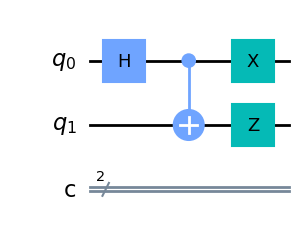

In [49]:
qc_b4.draw()

# Ejercicio 2
Implementar los circuitos de cuatro cúbits que suman al registro cuántico los valores 1, 2, 3, 4, 5, 6, 7 y 8 y verificar que funcionan correctamente. Utilizar QISKit Quantum lab.

In [34]:
def sv_latex_from_qc(qc, backend):
    sv = backend.run(qc).result().get_statevector()
    return sv.draw(output='latex')


Creamos un circuito cuántico de 4 qubits

In [35]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(0)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [36]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(1)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [56]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(0)
qc_ej2.x(1)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [38]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(2)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [39]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(0)
qc_ej2.x(2)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [40]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(0)
qc_ej2.x(2)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [41]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(0)
qc_ej2.x(1)
qc_ej2.x(2)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

In [42]:
qc_ej2 = QuantumCircuit(4, 4)
qc_ej2.x(3)
sv_latex_from_qc(qc_ej2, backend)

<IPython.core.display.Latex object>

### <span style="color:red;">JHZ: Mi versión en base a lo del vídeo de complementos formativos </span>

# Ejercicio 2
Implementar los circuitos de cuatro cúbits que suman al registro cuántico los valores 1, 2, 3, 4, 5, 6, 7 y 8 y verificar que funcionan correctamente. Utilizar QISKit Quantum lab.

Para simplificar las pruebas, implementaremos una sencilla función que encapsula la ejecución del circuito cuántico y la representación de su vector de estado de salida.

In [34]:
def sv_latex_from_qc(qc, backend):
    sv = backend.run(qc).result().get_statevector()
    return sv.draw(output='latex')

Puesto que la generación de circuitos de adición binaria es conceptualmente sencilla de automatizar, en lugar de crear los circuitos de suma pedidos en el enunciado vamos a definir una función que los cree en base a un parámetro (el valor a sumar). Veamos la implementación de esta función:

### `circuit_adder` Function:

**Purpose:**
The `circuit_adder` function is designed to create a quantum circuit to add a number to an existing 4-qubit circuit.

**Attributes:**
- `num` (int): A number to add to the circuit. It must be between 0 and 8.

**Methods:**
None

**Example Usage:**
```python
qc_adder_7 = circuit_adder(7)
qc_final = qc_already_exist.compose(qc_adder_7) # Concatenate both quantum circuits to add 7 to the already existing qc_already_exist quantum circuit


In [125]:
def circuit_adder (num):
    if num<1 or num>8:
        raise ValueError("Out of range")  ## El enunciado limita el sumador a los valores entre 1 y 8. Quitar esta restricción sería directo.
    # Definición del circuito base que vamos a construir
    qreg_q = QuantumRegister(4, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    
    qbit_position = 0
    for element in reversed(np.binary_repr(num)):
        if (element=='1'):
            circuit.barrier()
            match qbit_position:
                case 0: # +1
                    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
                    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
                    circuit.cx(qreg_q[0], qreg_q[1])
                    circuit.x(qreg_q[0])
                case 1: # +2
                    circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
                    circuit.cx(qreg_q[1], qreg_q[2])
                    circuit.x(qreg_q[1])
                case 2: # +4
                    circuit.cx(qreg_q[2], qreg_q[3])
                    circuit.x(qreg_q[2])
                case 3: # +8
                    circuit.x(qreg_q[3])
        qbit_position+=1
    return circuit

Probamos la función generadora de circuitos generando un sumador para el número binario 3

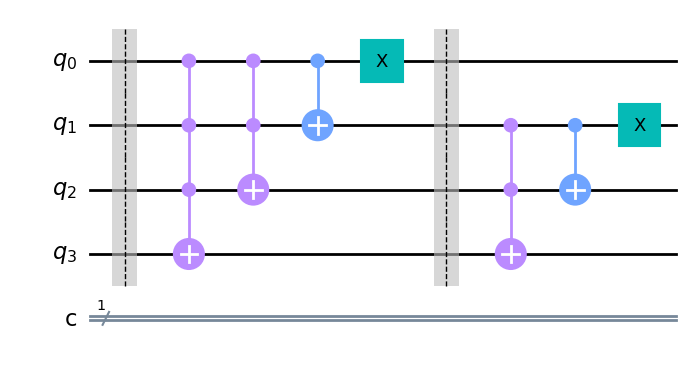

In [116]:
add_3 = circuit_adder(3)
add_3.draw()

A continuación, reutilizaremos el circuito anterior (+3) y creamos un circuito cuántico que represente el número 2 para validar que genera un valor equivalente a 5.

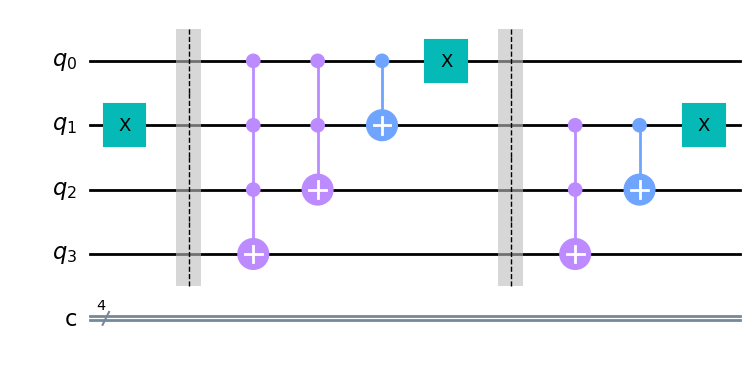

In [117]:
qc_test_2 = QuantumCircuit(4, 4)
qc_test_2.x(1)

qc_test_2_plus_3 = qc_test_2.compose(add_3)
qc_test_2_plus_3.draw()

Y validamos su resultado:

In [118]:
sv_latex_from_qc(qc_test_2_plus_3, backend)

<IPython.core.display.Latex object>

Realizamos otra prueba sumando 8 a un estado previo de 7:

In [123]:
qc_test_7 = QuantumCircuit(4, 4)
qc_test_7.x(0)
qc_test_7.x(1)
qc_test_7.x(2)

qc_test_7_plus_8 = qc_test_7.compose(circuit_adder(8))
sv_latex_from_qc(qc_test_7_plus_8, backend)
#qc_test_7_plus_8.draw()

<IPython.core.display.Latex object>

Con lo que validamos que se realizan todas las sumas correctamente, incluyendo aquellas que requieren de acarreo.

# Ejercicio 3
Implementar en Python el algoritmo de teleportación cuántica para teleportar el estado $|{\Psi}\rangle$ del cúbit de Alice al cúbit de Bob. El estado $|{\Psi}\rangle$ viene determinado por los ángulos $\theta=37.5$ grados y $\phi=13.4$ grados, de la esfera de Bloch.

En primer lugar convertiremos los ángulos proporcionados por el enunciado a radianes, que nos permitan operar correctamente en el sistema:

* $\theta=37.5$ grados = 6.544985 radianes
* $\phi=13.4$ grados = 2.338741 radianes

Utilizaremos $\theta$ como ángulo de giro en el eje X del qubit y $\phi$ sobre el eje Z.

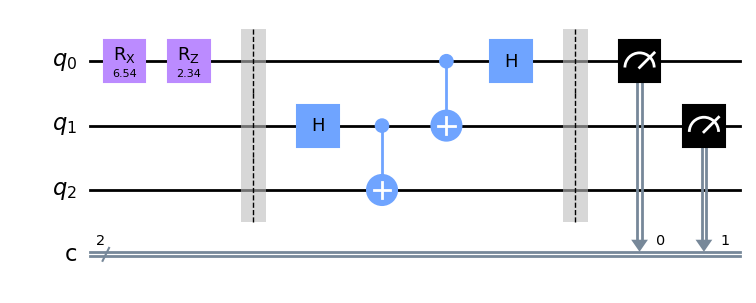

In [130]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
qc_ej3 = QuantumCircuit(qreg_q, creg_c)

# Creación del estado Psi
qc_ej3.rx(6.544985, qreg_q[0])
qc_ej3.rz(2.338741, qreg_q[0])
qc_ej3.barrier()

# Implementación de la primera parte del protocolo de teleportación
qc_ej3.h(qreg_q[1])
qc_ej3.cx(qreg_q[1], qreg_q[2]) # Entrelazamiento del qubit para Bob
qc_ej3.cx(qreg_q[0], qreg_q[1])
qc_ej3.h(qreg_q[0])
qc_ej3.barrier()

# Mediciones de Alice
qc_ej3.measure(qreg_q[0], creg_c[0])
qc_ej3.measure(qreg_q[1], creg_c[1])


qc_ej3.draw()


<span style="color:red;">Seguir con el protocolo: Alice mide y c0,c1 y en base a eso Bob modifica q2 siguiendo el algoritmo correspondiente. </span>